In [1]:
## Importar librerias y dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## Carga del dataset 
dataframe = pd.read_csv('heart_disease_transformed.csv')
clasificadores = ['Normal','Enfermedad']

In [2]:
## Mostara primeras diez filas
dataframe.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,0,172,0,0.0,0,0
1,49,0,2,160,180,0,0,156,0,1.0,1,1
2,37,1,1,130,283,0,1,98,0,0.0,0,0
3,48,0,3,138,214,0,0,108,1,1.5,1,1
4,54,1,2,150,195,0,0,122,0,0.0,0,0
5,39,1,2,120,339,0,0,170,0,0.0,0,0
6,45,0,1,130,237,0,0,170,0,0.0,0,0
7,54,1,1,110,208,0,0,142,0,0.0,0,0
8,37,1,3,140,207,0,0,130,1,1.5,1,1
9,48,0,1,120,284,0,0,120,0,0.0,0,0


In [3]:
## Cantidad de datos con enfermedad cardiaca o normal
dataframe.groupby('HeartDisease').size()

HeartDisease
0    410
1    508
dtype: int64

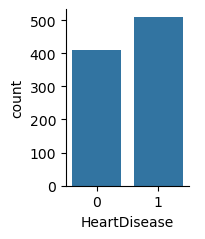

In [4]:
## Grafico comparativos entre tipos de casos
sb.catplot(x = 'HeartDisease',data=dataframe,kind="count",height=2.5,aspect=.8)

In [5]:
## Dividir los tipos de variables
y = dataframe['HeartDisease']
x = dataframe.drop('HeartDisease',axis=1)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=30)

from sklearn.neighbors import KNeighborsClassifier
knn_mm = KNeighborsClassifier(n_neighbors=5)

#Entrenar el algoritmo
knn_mm.fit(x_train,y_train)
predicciones = knn_mm.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,predicciones).ravel()

labels = ["Normal","Insuficiencia cardiaca"]
matriz = confusion_matrix(y_test,predicciones, labels=[0,1])
print(pd.DataFrame(matriz, index = labels, columns = labels))

print(classification_report(y_test,predicciones,target_names=clasificadores))

                        Normal  Insuficiencia cardiaca
Normal                      86                      41
Insuficiencia cardiaca      39                     110
              precision    recall  f1-score   support

      Normal       0.69      0.68      0.68       127
  Enfermedad       0.73      0.74      0.73       149

    accuracy                           0.71       276
   macro avg       0.71      0.71      0.71       276
weighted avg       0.71      0.71      0.71       276



In [12]:
##Evaluar el modelo
#Prediccion nueva
nuevo_paciente = {
    'Age': 55,
    'Sex': 1,
    'ChestPainType': 2,
    'RestingBP': 130,
    'Cholesterol': 245,
    'FastingBS': 0,
    'RestingECG': 0,
    'MaxHR': 150,
    'ExerciseAngina': 0,
    'Oldpeak': 1.0,
    'ST_Slope': 1
}

paciente_df = pd.DataFrame([nuevo_paciente])

prediccion_knn = knn_mm.predict(paciente_df)
prediccion_knnproba = knn_mm.predict_proba(paciente_df)

In [15]:
print(prediccion_knn)
print(prediccion_knnproba)

[1]
[[0.4 0.6]]
